In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import csv 
from sklearn.preprocessing import MinMaxScaler
import re
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score,r2_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor




data = pd.read_csv('cycle-counts-1-jan-31-december-2023.csv')

In [3]:
data.head()


,Time,Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023),Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) North Cyclist,Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) South Cyclist,Clontarf - James Larkin Rd,Clontarf - James Larkin Rd Cyclist West,Clontarf - James Larkin Rd Cyclist East,Clontarf - Pebble Beach Carpark,Clontarf - Pebble Beach Carpark Cyclist West,Clontarf - Pebble Beach Carpark Cyclist East,...,Grove Road Totem OUT,Grove Road Totem IN,North Strand Rd N/B (Counter Removed for Roadworks) Cyclist,North Strand Rd S/B (Counter Removed for Roadworks) Cyclist,Richmond Street Inbound,Richmond Street Inbound Cyclist South,Richmond Street Inbound Cyclist North,Richmond Street Outbound,Richmond Street Outbound Cyclist North,Richmond Street Outbound Cyclist South
0,01/01/2023 00:00,1.0,0.0,1.0,1.0,1.0,0.0,5.0,3.0,2.0,...,6.0,6.0,0.0,NaN,2.0,0.0,2.0,8.0,0.0,8.0
1,01/01/2023 01:00,0.0,0.0,0.0,6.0,4.0,2.0,2.0,2.0,0.0,...,9.0,4.0,0.0,NaN,0.0,0.0,0.0,6.0,0.0,6.0
2,01/01/2023 02:00,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,...,4.0,5.0,0.0,NaN,3.0,0.0,3.0,9.0,0.0,9.0
3,01/01/2023 03:00,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,7.0,5.0,0.0,NaN,4.0,1.0,3.0,8.0,0.0,8.0
4,01/01/2023 04:00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,13.0,4.0,0.0,NaN,4.0,0.0,4.0,4.0,0.0,4.0


In [4]:
data.tail()

,Time,Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023),Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) North Cyclist,Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) South Cyclist,Clontarf - James Larkin Rd,Clontarf - James Larkin Rd Cyclist West,Clontarf - James Larkin Rd Cyclist East,Clontarf - Pebble Beach Carpark,Clontarf - Pebble Beach Carpark Cyclist West,Clontarf - Pebble Beach Carpark Cyclist East,...,Grove Road Totem OUT,Grove Road Totem IN,North Strand Rd N/B (Counter Removed for Roadworks) Cyclist,North Strand Rd S/B (Counter Removed for Roadworks) Cyclist,Richmond Street Inbound,Richmond Street Inbound Cyclist South,Richmond Street Inbound Cyclist North,Richmond Street Outbound,Richmond Street Outbound Cyclist North,Richmond Street Outbound Cyclist South
8755,31/12/2023 19:00,NaN,NaN,NaN,7.0,4.0,3.0,5.0,3.0,2.0,...,19.0,26.0,0.0,NaN,34.0,1.0,33.0,17.0,0.0,17.0
8756,31/12/2023 20:00,NaN,NaN,NaN,2.0,2.0,0.0,10.0,4.0,6.0,...,23.0,22.0,0.0,NaN,43.0,1.0,42.0,19.0,0.0,19.0
8757,31/12/2023 21:00,NaN,NaN,NaN,1.0,1.0,0.0,6.0,3.0,3.0,...,9.0,9.0,0.0,NaN,25.0,0.0,25.0,9.0,0.0,9.0
8758,31/12/2023 22:00,NaN,NaN,NaN,2.0,1.0,1.0,4.0,3.0,1.0,...,7.0,11.0,0.0,NaN,14.0,0.0,14.0,9.0,0.0,9.0
8759,31/12/2023 23:00,NaN,NaN,NaN,3.0,1.0,2.0,11.0,3.0,8.0,...,6.0,4.0,0.0,NaN,18.0,0.0,18.0,7.0,0.0,7.0


In [5]:
data.shape

(8760, 33)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 33 columns):
 #   Column                                                                                             Non-Null Count  Dtype  
---  ------                                                                                             --------------  -----  
 0   Time                                                                                               8760 non-null   object 
 1   Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023)                3263 non-null   float64
 2   Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) North Cyclist  3263 non-null   float64
 3   Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) South Cyclist  3263 non-null   float64
 4   Clontarf - James Larkin Rd                                                                         8759 non-null   float

In [7]:
data.isnull().sum()

Time                                                                                                    0
Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023)                  5497
Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) North Cyclist    5497
Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) South Cyclist    5497
Clontarf - James Larkin Rd                                                                              1
Clontarf - James Larkin Rd Cyclist West                                                                 1
Clontarf - James Larkin Rd Cyclist East                                                                 1
Clontarf - Pebble Beach Carpark                                                                        15
Clontarf - Pebble Beach Carpark Cyclist West                                                           15
Clontarf - Pebble Beach Carpark Cyclist East  

In [8]:
data.isnull().sum() / data.shape[0] * 100

Time                                                                                                   0.000000
Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023)                   62.751142
Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) North Cyclist     62.751142
Charleville Mall (Unable to Reinstall Repaired Counter due to Roadworks 23.08.2023) South Cyclist     62.751142
Clontarf - James Larkin Rd                                                                             0.011416
Clontarf - James Larkin Rd Cyclist West                                                                0.011416
Clontarf - James Larkin Rd Cyclist East                                                                0.011416
Clontarf - Pebble Beach Carpark                                                                        0.171233
Clontarf - Pebble Beach Carpark Cyclist West                                                           0

In [9]:
 #1. Handling Missing Values
data.fillna(0, inplace=True)  # Replace missing values with 0

default_datetime = pd.to_datetime("2023-01-01")






In [10]:
# 2. Removing Duplicates
data.drop_duplicates(inplace=True)  # Remove duplicate rows


In [11]:


# 3. Replace values in the 'Time' column to keep only the date part in DD/MM/YYYY format
data['Time'] = data['Time'].str.replace(r'(\d{2}/\d{2}/2023).*', r'\1', regex=True)



In [12]:

# 4. Renaming Columns (if needed, to simplify headers)
data.rename(columns=lambda x: x.strip().replace(" ", "_").replace("-", "_"), inplace=True)


In [13]:

# 5. Creating New Features (if needed)
data['Total_Cyclists'] = data.iloc[:, 1:].sum(axis=1)  # Example: Sum all cyclist counts per row


In [14]:


# 6. Removing Outliers (Optional: if values are unrealistic)
for column in data.select_dtypes(include=['int64', 'float64']):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    data[column] = data[column].clip(lower=lower_bound, upper=upper_bound)
    

In [15]:
data.isnull().sum()

Time                                                                                                 0
Charleville_Mall_(Unable_to_Reinstall_Repaired_Counter_due_to_Roadworks_23.08.2023)                  0
Charleville_Mall_(Unable_to_Reinstall_Repaired_Counter_due_to_Roadworks_23.08.2023)_North_Cyclist    0
Charleville_Mall_(Unable_to_Reinstall_Repaired_Counter_due_to_Roadworks_23.08.2023)_South_Cyclist    0
Clontarf___James_Larkin_Rd                                                                           0
Clontarf___James_Larkin_Rd_Cyclist_West                                                              0
Clontarf___James_Larkin_Rd_Cyclist_East                                                              0
Clontarf___Pebble_Beach_Carpark                                                                      0
Clontarf___Pebble_Beach_Carpark_Cyclist_West                                                         0
Clontarf___Pebble_Beach_Carpark_Cyclist_East                             

In [16]:
# Preview cleaned data
print(data.head())


         Time  \
0  01/01/2023   
1  01/01/2023   
2  01/01/2023   
3  01/01/2023   
4  01/01/2023   

   Charleville_Mall_(Unable_to_Reinstall_Repaired_Counter_due_to_Roadworks_23.08.2023)  \
0                                                1.0                                     
1                                                0.0                                     
2                                                0.0                                     
3                                                1.0                                     
4                                                0.0                                     

   Charleville_Mall_(Unable_to_Reinstall_Repaired_Counter_due_to_Roadworks_23.08.2023)_North_Cyclist  \
0                                                0.0                                                   
1                                                0.0                                                   
2                                           

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Charleville_Mall_(Unable_to_Reinstall_Repaired_Counter_due_to_Roadworks_23.08.2023),8760.0,1.814212,3.010274,0.0,0.0,0.0,3.00,7.500
Charleville_Mall_(Unable_to_Reinstall_Repaired_Counter_due_to_Roadworks_23.08.2023)_North_Cyclist,8760.0,0.646461,1.052731,0.0,0.0,0.0,1.00,2.500
Charleville_Mall_(Unable_to_Reinstall_Repaired_Counter_due_to_Roadworks_23.08.2023)_South_Cyclist,8760.0,0.597603,1.013723,0.0,0.0,0.0,1.00,2.500
Clontarf___James_Larkin_Rd,8760.0,35.337728,37.548728,0.0,3.0,23.0,56.00,135.500
Clontarf___James_Larkin_Rd_Cyclist_West,8760.0,17.092295,18.621399,0.0,2.0,10.0,27.00,64.500
Clontarf___James_Larkin_Rd_Cyclist_East,8760.0,17.319635,19.447462,0.0,1.0,10.0,27.00,66.000
Clontarf___Pebble_Beach_Carpark,8760.0,49.541210,51.914042,0.0,5.0,33.0,78.00,187.500
Clontarf___Pebble_Beach_Carpark_Cyclist_West,8760.0,22.540011,24.676015,0.0,2.0,14.0,35.00,84.500
Clontarf___Pebble_Beach_Carpark_Cyclist_East,8760.0,25.205251,26.979317,0.0,3.0,15.0,38.00,90.500
Drumcondra_Cyclists_Inbound_(Not_On_Site___Roadworks)_Cyclist,8760.0,3.360731,5.020134,0.0,0.0,0.0,6.00,15.000


In [18]:
data.describe(include="float").T

,count,mean,std,min,25%,50%,75%,max
Charleville_Mall_(Unable_to_Reinstall_Repaired_Counter_due_to_Roadworks_23.08.2023),8760.0,1.814212,3.010274,0.0,0.0,0.0,3.00,7.500
Charleville_Mall_(Unable_to_Reinstall_Repaired_Counter_due_to_Roadworks_23.08.2023)_North_Cyclist,8760.0,0.646461,1.052731,0.0,0.0,0.0,1.00,2.500
Charleville_Mall_(Unable_to_Reinstall_Repaired_Counter_due_to_Roadworks_23.08.2023)_South_Cyclist,8760.0,0.597603,1.013723,0.0,0.0,0.0,1.00,2.500
Clontarf___James_Larkin_Rd,8760.0,35.337728,37.548728,0.0,3.0,23.0,56.00,135.500
Clontarf___James_Larkin_Rd_Cyclist_West,8760.0,17.092295,18.621399,0.0,2.0,10.0,27.00,64.500
Clontarf___James_Larkin_Rd_Cyclist_East,8760.0,17.319635,19.447462,0.0,1.0,10.0,27.00,66.000
Clontarf___Pebble_Beach_Carpark,8760.0,49.541210,51.914042,0.0,5.0,33.0,78.00,187.500
Clontarf___Pebble_Beach_Carpark_Cyclist_West,8760.0,22.540011,24.676015,0.0,2.0,14.0,35.00,84.500
Clontarf___Pebble_Beach_Carpark_Cyclist_East,8760.0,25.205251,26.979317,0.0,3.0,15.0,38.00,90.500
Drumcondra_Cyclists_Inbound_(Not_On_Site___Roadworks)_Cyclist,8760.0,3.360731,5.020134,0.0,0.0,0.0,6.00,15.000


In [19]:
data.select_dtypes(include="number").columns


Index(['Charleville_Mall_(Unable_to_Reinstall_Repaired_Counter_due_to_Roadworks_23.08.2023)',
       'Charleville_Mall_(Unable_to_Reinstall_Repaired_Counter_due_to_Roadworks_23.08.2023)_North_Cyclist',
       'Charleville_Mall_(Unable_to_Reinstall_Repaired_Counter_due_to_Roadworks_23.08.2023)_South_Cyclist',
       'Clontarf___James_Larkin_Rd', 'Clontarf___James_Larkin_Rd_Cyclist_West',
       'Clontarf___James_Larkin_Rd_Cyclist_East',
       'Clontarf___Pebble_Beach_Carpark',
       'Clontarf___Pebble_Beach_Carpark_Cyclist_West',
       'Clontarf___Pebble_Beach_Carpark_Cyclist_East',
       'Drumcondra_Cyclists_Inbound_(Not_On_Site___Roadworks)_Cyclist',
       'Drumcondra_Cyclists_Inbound_(Not_On_Site___Roadworks)_Cyclist_West',
       'Drumcondra_Cyclists_Inbound_(Not_On_Site___Roadworks)_Cyclist_East',
       'Drumcondra_Cyclists_Outbound_(Not_On_Site___Roadworks)',
       'Drumcondra_Cyclists_Outbound_(Not_On_Site___Roadworks)_Cyclist_East',
       'Drumcondra_Cyclists_Outbound_(N

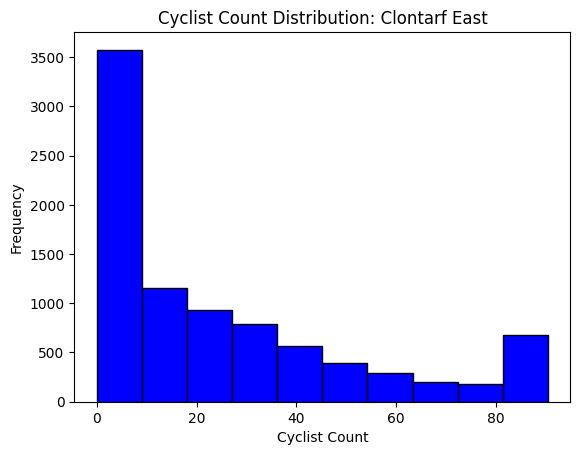

In [20]:
cyclist_data = data.get('Clontarf___Pebble_Beach_Carpark_Cyclist_East')
if cyclist_data is not None:
    plt.hist(cyclist_data, bins=10, color='blue', edgecolor='black')
    plt.title("Cyclist Count Distribution: Clontarf East")
    plt.xlabel("Cyclist Count")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("Column not found.")

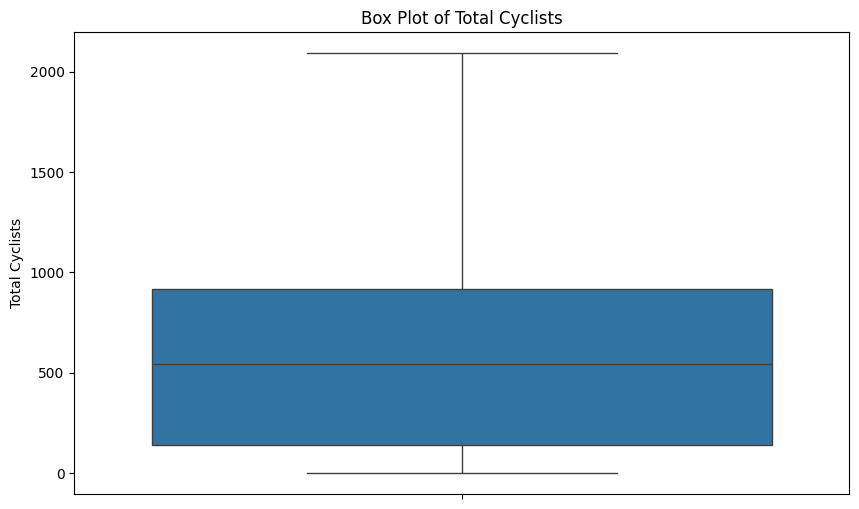

In [21]:

# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['Total_Cyclists'])
plt.title('Box Plot of Total Cyclists')
plt.ylabel('Total Cyclists')
plt.show()


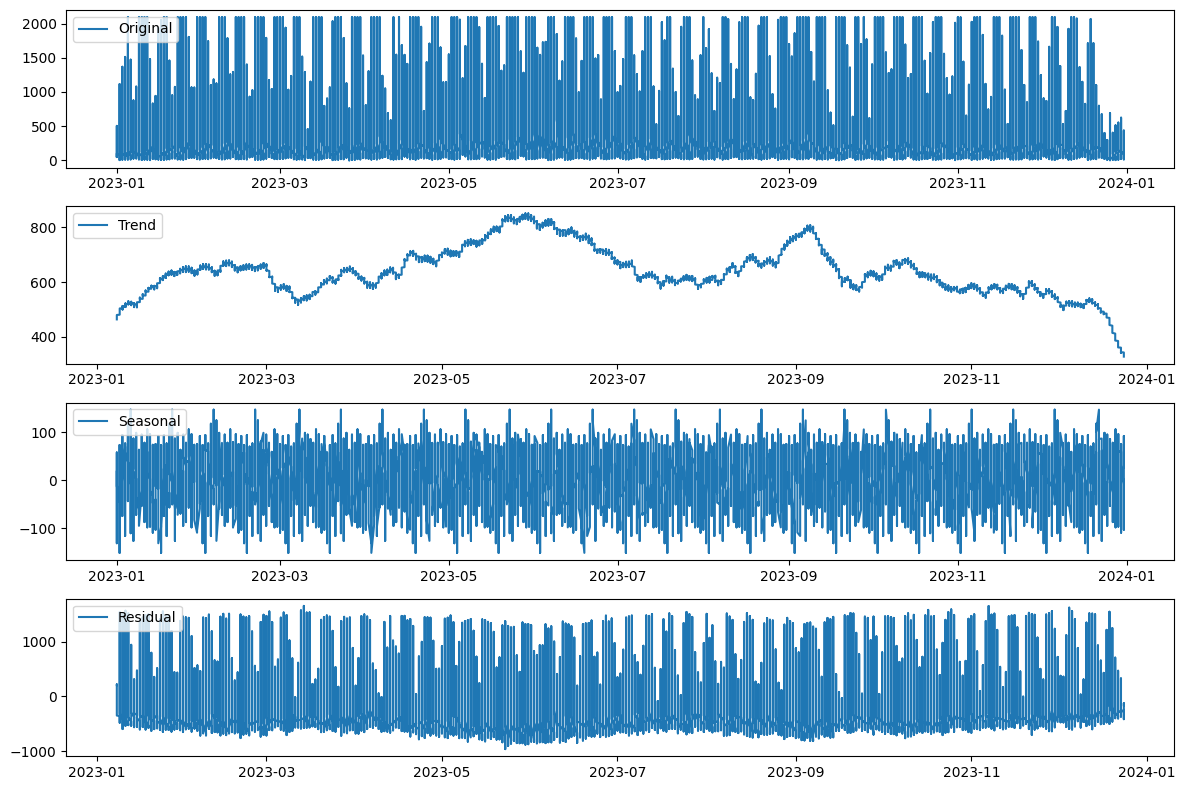

In [22]:
# Seasonal Decompositions 

# Convert 'Time' to datetime
data['Time'] = pd.to_datetime(data['Time'], dayfirst=True) 
data.set_index('Time', inplace=True)  # Set 'Time' as the index

decomposition = seasonal_decompose(data['Total_Cyclists'], model='additive', period=365)

# Extract the components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Total_Cyclists'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

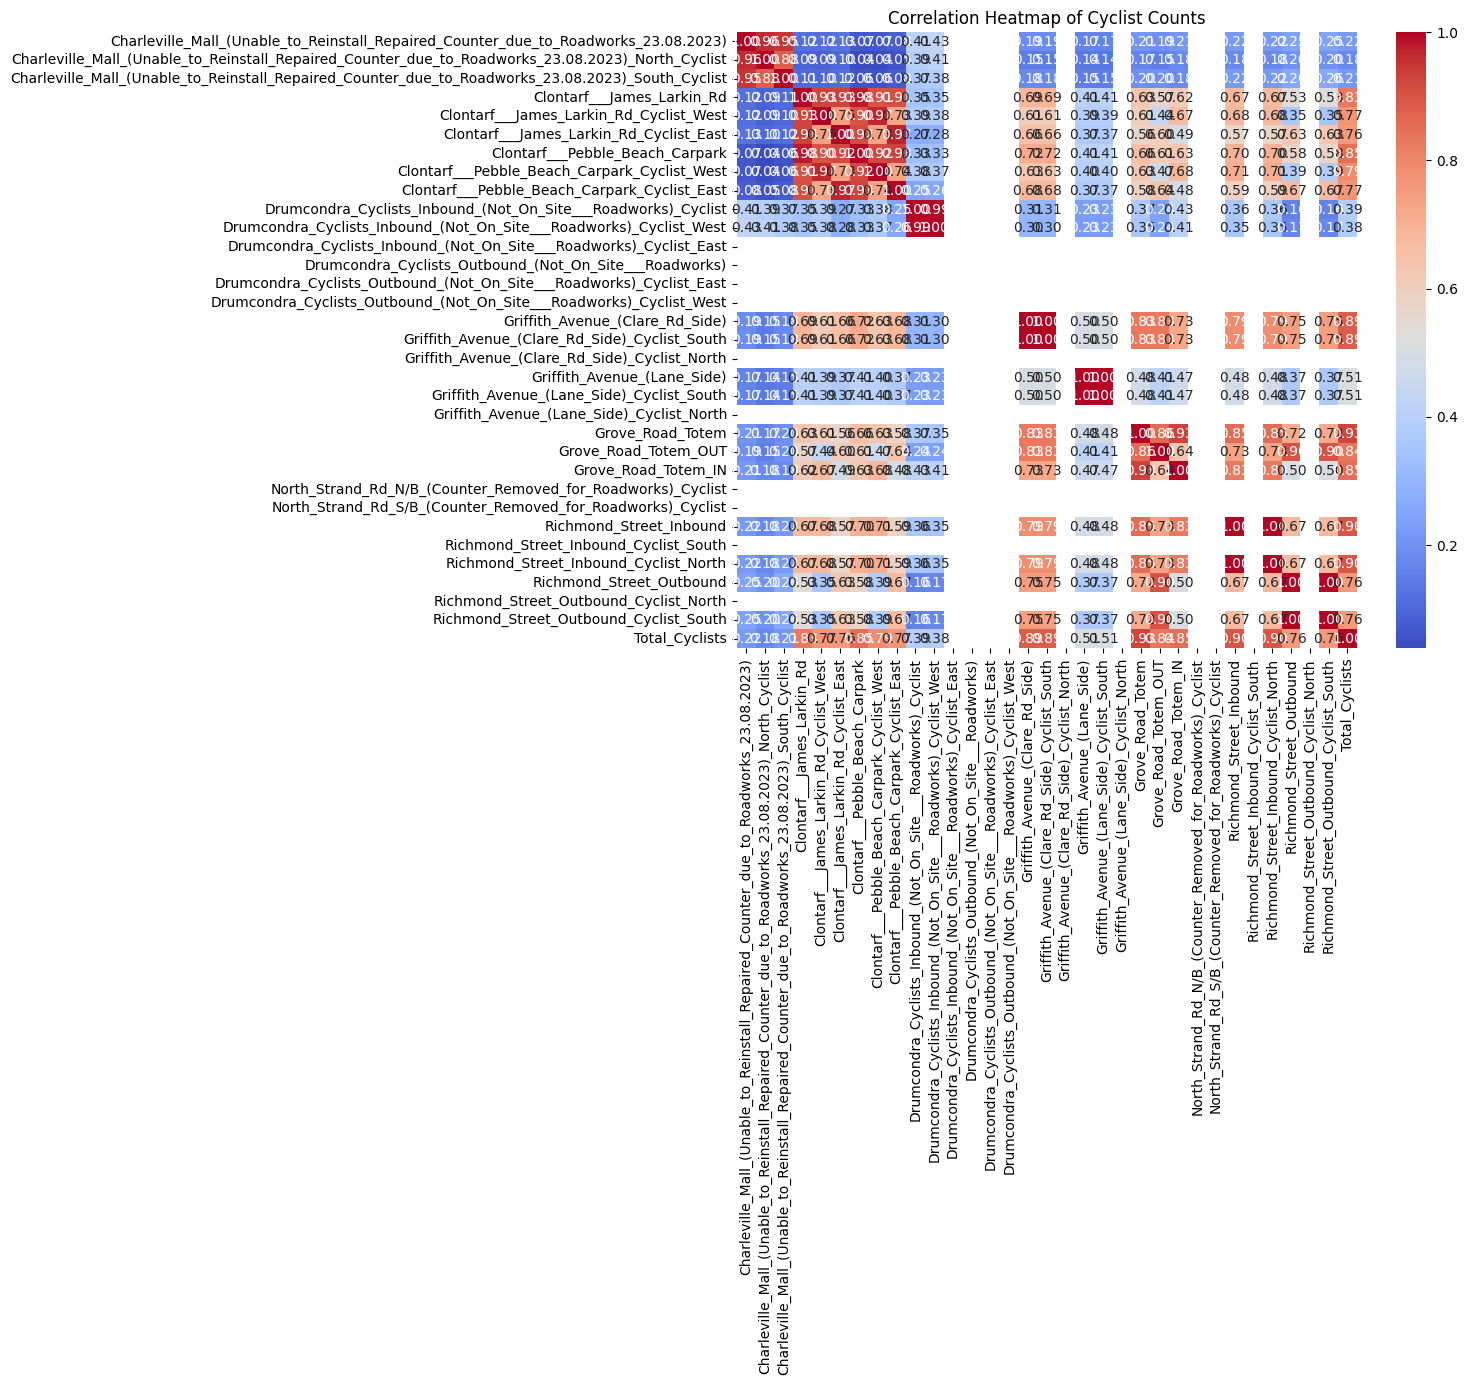

In [23]:
#  Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['int64', 'float64'])

# Calculating the correlation matrix
correlation_matrix = numeric_data.corr()

# Step 3: Create the heatmap
plt.figure(figsize=(10, 8)) 
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Cyclist Counts")
plt.show()

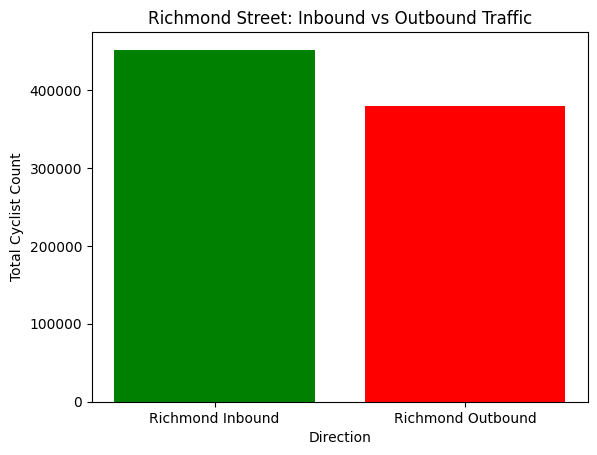

In [24]:
labels = ['Richmond Inbound', 'Richmond Outbound']
inbound = data['Richmond_Street_Inbound']
outbound = data['Richmond_Street_Outbound']
plt.bar(labels, [sum(inbound), sum(outbound)], color=['green', 'red'])
plt.title("Richmond Street: Inbound vs Outbound Traffic")
plt.xlabel("Direction")
plt.ylabel("Total Cyclist Count")
plt.show()

Duplicate index values found. Removing duplicates...
ADF Statistic: -2.1636045005143165
p-value: 0.21971900813831668
Data is not stationary, need differencing
ADF Statistic: -6.7431242044527675
p-value: 3.08267637345718e-09
Data is stationary


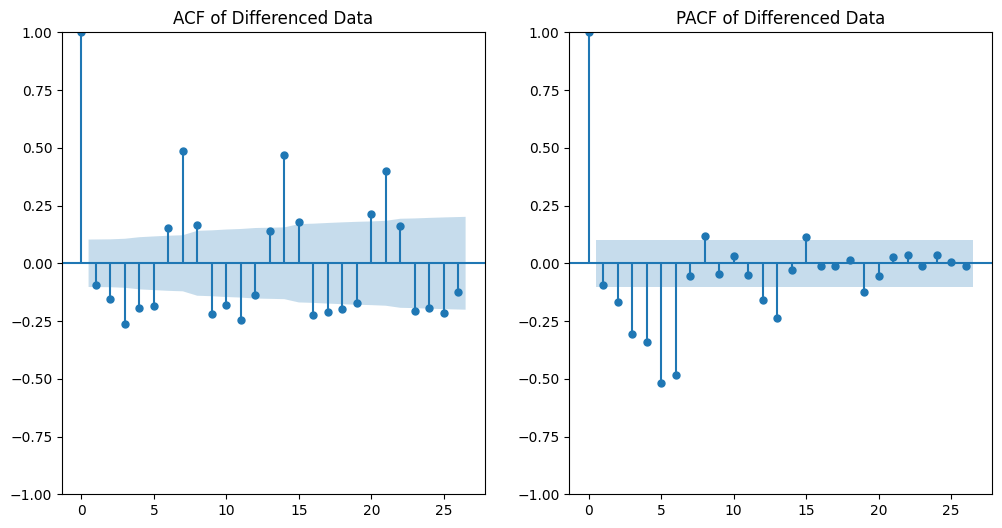

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         Total_Cyclists   No. Observations:                  365
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1858.827
Date:                Wed, 11 Dec 2024   AIC                           3729.654
Time:                        20:18:34   BIC                           3753.037
Sample:                    01-01-2023   HQIC                          3738.947
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4436      0.046     -9.563      0.000      -0.535      -0.353
ar.L2         -0.4575      0.046     -9.999      0.000      -0.547      -0.368
ar.L3         -0.5021      0.048    -10.539      0.0

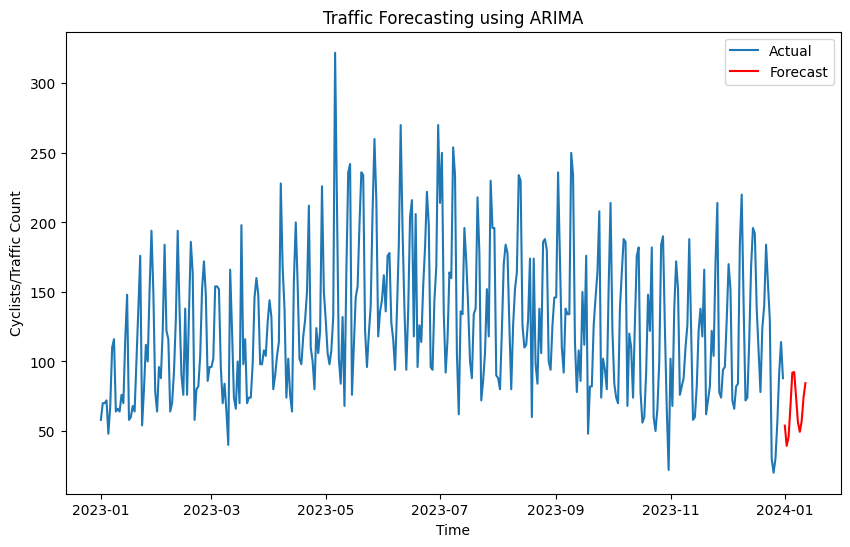

Root Mean Squared Error (RMSE): 45.56699115113466


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [25]:



# for Stationarity using the Augmented Dickey-Fuller Test (ADF Test)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt


#Checking for duplicate index values
duplicates = data.index.duplicated()
if duplicates.any():
    print("Duplicate index values found. Removing duplicates...")
    data = data[~data.index.duplicated(keep='first')]  # Keeping the first occurrence

# Checking for stationarity using the Augmented Dickey-Fuller Test (ADF Test)
def test_stationarity(data):
    result = adfuller(data)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("Data is stationary")
    else:
        print("Data is not stationary, need differencing")

# Checking stationarity of the target variable 'Total_Cyclists'
test_stationarity(data['Total_Cyclists'])

# Differencing - (if the data is not stationary)
data['diff'] = data['Total_Cyclists'].diff()

# Test the differenced data for stationarity
test_stationarity(data['diff'].dropna())

# Plottings ACF and PACF to determine AR and MA order
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_acf(data['diff'].dropna(), ax=plt.gca())  # Auto-correlation function
plt.title('ACF of Differenced Data')

plt.subplot(1, 2, 2)
plot_pacf(data['diff'].dropna(), ax=plt.gca())  # Partial Auto-correlation function
plt.title('PACF of Differenced Data')

plt.show()

# Defining and Fitting the ARIMA Model
# p = AR order, d = Differencing order, q = MA order
model = ARIMA(data['Total_Cyclists'], order=(5, 1, 0))  # Example: AR(5), I(1), MA(0)
model_fit = model.fit()

# Summarizing the Model
print(model_fit.summary())

# Step 7: Make Forecasts
forecast_steps = 12 
forecast = model_fit.forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

# Plot Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.plot(data['Total_Cyclists'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.legend()
plt.title('Traffic Forecasting using ARIMA')
plt.xlabel('Time')
plt.ylabel('Cyclists/Traffic Count')
plt.show()



# Evaluate the Model with RMSE (Root Mean Squared Error)
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Fit the ARIMA model on the training data
train_model = ARIMA(train_data['Total_Cyclists'], order=(5,1,0))
train_model_fit = train_model.fit()

# Make predictions on the test set
predictions = train_model_fit.forecast(steps=len(test_data))
rmse = sqrt(mean_squared_error(test_data['Total_Cyclists'], predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")


In [26]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import pandas as pd

# Ensure the 'Time' column is set as a datetime index with a daily frequency
data.index = pd.to_datetime(data.index)
data = data.asfreq('D')

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# ADF Test for stationarity
def test_stationarity(timeseries):
    adf_result = adfuller(timeseries)
    print('ADF Statistic:', adf_result[0])
    print('p-value:', adf_result[1])
    if adf_result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is not stationary")

test_stationarity(train_data['Total_Cyclists'])

# Fit ARIMA model
model = ARIMA(train_data['Total_Cyclists'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast and classify
predictions = model_fit.forecast(steps=len(test_data))
threshold = 40  # Adjust threshold if necessary
y_true = test_data['Total_Cyclists'].apply(lambda x: 1 if x > threshold else 0)
y_pred = (predictions > threshold).astype(int)

accuracy = accuracy_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])  # Include all labels
precision = precision_score(y_true, y_pred, zero_division=0)
recall = recall_score(y_true, y_pred, zero_division=0)
f1 = f1_score(y_true, y_pred, average='weighted')  # Use y_true instead of y_test

# Print results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(cm)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1:.2f}")


ADF Statistic: -2.364223372059475
p-value: 0.15208968304019543
Data is not stationary
Accuracy: 94.52%
Confusion Matrix:
[[ 0  4]
 [ 0 69]]
Precision: 0.9452054794520548
Recall: 1.0
F1-Score: 0.92


Mean Squared Error: 67.37
R^2 Score: 0.97


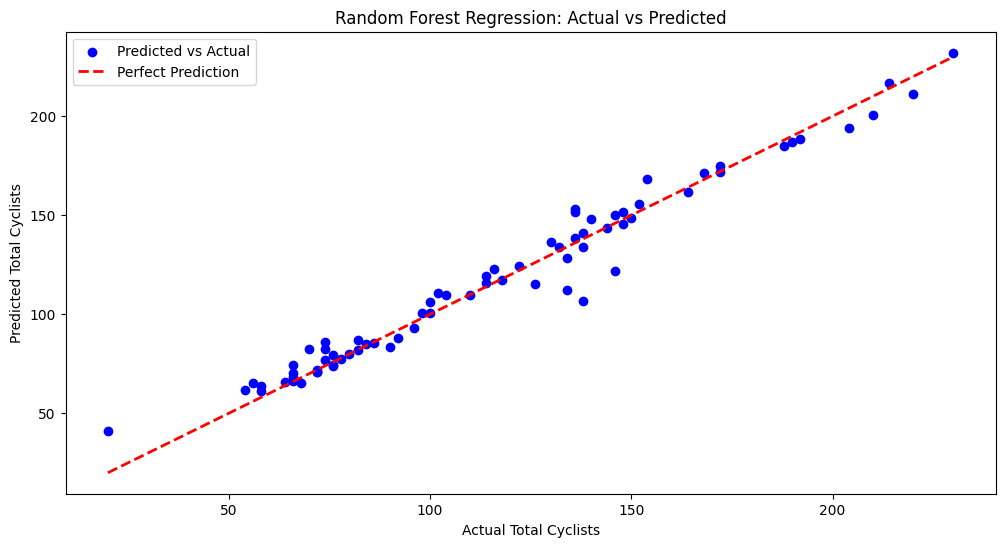

In [27]:
# Random forest regressor 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
data.columns = data.columns.str.strip()

target = 'Total_Cyclists'  # 
features = data.drop(columns=[target])  # Drop the target column to get features
X = features  # Features
y = data[target].values  # Target variable

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)



# Print evaluation metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Visualize Actual vs Predicted
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.title('Random Forest Regression: Actual vs Predicted')
plt.xlabel('Actual Total Cyclists')
plt.ylabel('Predicted Total Cyclists')
plt.legend()
plt.show()



In [28]:

import pandas as pd
from sklearn.model_selection import train_test_split
from tpot import TPOTRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load your dataset

target = 'Total_Cyclists'  
features = data.drop(columns=[target])  # Drop the target column to get features
X = features.values  # Features
y = data[target].values  # Target variable

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the TPOT Regressor
tpot = TPOTRegressor(verbosity=2, generations=5, population_size=20, random_state=42)
tpot.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tpot.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"TPOT Mean Squared Error: {mse:.2f}")
print(f"TPOT R^2 Score: {r2:.2f}")

# Export the best pipeline
tpot.export('best_pipeline.py')

/opt/anaconda3/lib/python3.12/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -0.00022125645865603773

Generation 2 - Current best internal CV score: -0.00022125645865603773

Generation 3 - Current best internal CV score: -0.00022125645865603773

Generation 4 - Current best internal CV score: -0.00022125645865603773

Generation 5 - Current best internal CV score: -0.00022125645865603773

Best pipeline: RidgeCV(input_matrix)
Imputing missing values in feature set
TPOT Mean Squared Error: 0.00
TPOT R^2 Score: 1.00
